Training for fold 1...
Epoch 1/25
8/8 [==============================] - 3s 47ms/step - loss: 0.7072 - accuracy: 0.5647 - val_loss: 0.6020 - val_accuracy: 0.6923
Epoch 2/25
8/8 [==============================] - 0s 10ms/step - loss: 0.5298 - accuracy: 0.7586 - val_loss: 0.5167 - val_accuracy: 0.7692
Epoch 3/25
8/8 [==============================] - 0s 7ms/step - loss: 0.4342 - accuracy: 0.8276 - val_loss: 0.4641 - val_accuracy: 0.8846
Epoch 4/25
8/8 [==============================] - 0s 10ms/step - loss: 0.3687 - accuracy: 0.8793 - val_loss: 0.4160 - val_accuracy: 0.8462
Epoch 5/25
8/8 [==============================] - 0s 7ms/step - loss: 0.3263 - accuracy: 0.8836 - val_loss: 0.3935 - val_accuracy: 0.8462
Epoch 6/25
8/8 [==============================] - 0s 10ms/step - loss: 0.2657 - accuracy: 0.9052 - val_loss: 0.3709 - val_accuracy: 0.8846
Epoch 7/25
8/8 [==============================] - 0s 7ms/step - loss: 0.2506 - accuracy: 0.9181 - val_loss: 0.3634 - val_accuracy: 0.8462
Epoch 8

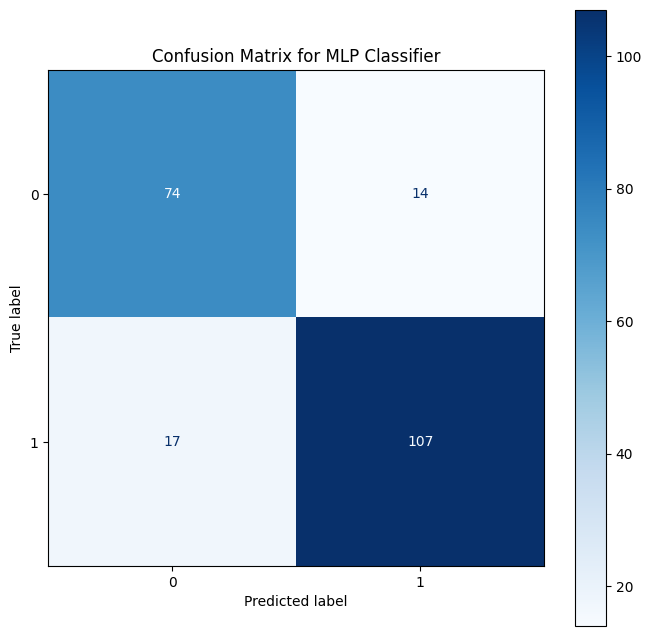

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = '/Final_dataset_Classific.xlsx'
dataset = pd.read_excel(file_path)
cols_to_drop = dataset.filter(like='Medication_').columns
dataset = dataset.drop(columns=cols_to_drop)

# Split the dataset into training and test sets
train_data, test_data = train_test_split(dataset, test_size=0.45, random_state=42)

# Prepare data for the classification task
train_data['Outcome_numerical_step1'] = train_data['Outcome_numerical'].replace(2, 0)
X_train = train_data.drop(columns=['Outcome_numerical', 'Outcome_numerical_step1'])
y_train = train_data['Outcome_numerical_step1']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Function to build the model
def build_model(input_dim, dropout_rate=0.25):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train the model with 10-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
fold_no = 1
losses = []
accuracies = []

for train, test in kfold.split(X_train_scaled, y_train):
    model = build_model(X_train_scaled.shape[1])
    print(f'Training for fold {fold_no}...')

    # Fit data to model
    history = model.fit(X_train_scaled[train], y_train.iloc[train],
                        batch_size=32,
                        epochs=25,
                        verbose=1,
                        validation_data=(X_train_scaled[test], y_train.iloc[test]))

    # Generate generalization metrics
    scores = model.evaluate(X_train_scaled[test], y_train.iloc[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    accuracies.append(scores[1] * 100)
    losses.append(scores[0])
    fold_no += 1

print(f'Average Accuracy: {np.mean(accuracies)}%')
print(f'Average Loss: {np.mean(losses)}')

# Prepare the test set
X_test = test_data.drop(columns=['Outcome_numerical'])
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test set
test_data['Predicted_step1'] = (model.predict(X_test_scaled) > 0.5).astype(int)

# Define y_test for evaluating the performance of predictions
y_test = test_data['Outcome_numerical'].replace(2, 0)
y_pred_step1 = test_data['Predicted_step1']

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_step1)

# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix for MLP Classifier')
plt.show()


Epoch 1/10
10/10 [==============================] - 1s 4ms/step - loss: 0.6913 - accuracy: 0.5823
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 0.5643 - accuracy: 0.7152
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 0.4415 - accuracy: 0.8544
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 0.3869 - accuracy: 0.8544
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.3202 - accuracy: 0.9114
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2543 - accuracy: 0.9557
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2205 - accuracy: 0.9494
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1626 - accuracy: 0.9684
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1358 - accuracy: 0.9937
Epoch 10/10
3/3 [==============================] - 0s 6ms/step
Step 2 Accuracy: 0.6593406593406593
Step 2 Precision: 0

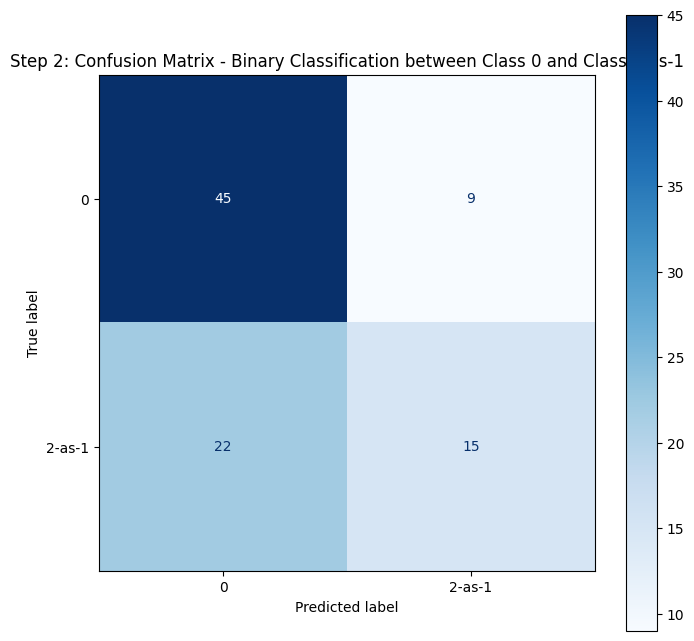

In [ ]:
# Function to build the model for Step 2
def build_model_step2(input_dim, dropout_rate=0.25):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Step 2: Prepare the test set
test_data_step2 = test_data[test_data['Predicted_step1'] == 0]
X_test_step2 = test_data_step2.drop(columns=['Outcome_numerical', 'Predicted_step1'])
y_test_step2 = test_data_step2['Outcome_numerical'].replace(2, 1)  # Re-encode class 2 as 1 for binary classification

# Prepare the training data for Step 2 (binary classification: class 0 vs class 2-as-1)
train_data_step2 = train_data[train_data['Outcome_numerical'] != 1]
X_train_step2 = train_data_step2.drop(columns=['Outcome_numerical', 'Outcome_numerical_step1'])
y_train_step2 = train_data_step2['Outcome_numerical'].replace(2, 1)

# Standardize features for Step 2
scaler_step2 = StandardScaler()
X_train_step2_scaled = scaler_step2.fit_transform(X_train_step2)

# Apply SMOTE for Step 2 to handle class imbalance
smote = SMOTE(random_state=42)
X_train_step2_smote, y_train_step2_smote = smote.fit_resample(X_train_step2_scaled, y_train_step2)

# Initialize the MLP model
model_step2 = build_model_step2(X_train_step2_smote.shape[1])

# Train the MLP model with specified parameters
model_step2.fit(X_train_step2_smote, y_train_step2_smote, epochs=10, batch_size=16, verbose=1)

# Scale features for Step 2 in the test set
X_test_step2_scaled = scaler_step2.transform(X_test_step2)

# Make predictions for Step 2
y_pred_step2 = (model_step2.predict(X_test_step2_scaled) > 0.5).astype(int)

# Calculate and display evaluation metrics for Step 2
accuracy_step2 = accuracy_score(y_test_step2, y_pred_step2)
precision_step2 = precision_score(y_test_step2, y_pred_step2)
recall_step2 = recall_score(y_test_step2, y_pred_step2)
f1_step2 = f1_score(y_test_step2, y_pred_step2)

print(f"Step 2 Accuracy: {accuracy_step2}")
print(f"Step 2 Precision: {precision_step2}")
print(f"Step 2 Recall: {recall_step2}")
print(f"Step 2 F1 Score: {f1_step2}")

# Visualize the confusion matrix for Step 2
conf_matrix_step2 = confusion_matrix(y_test_step2, y_pred_step2)
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_step2, display_labels=[0, '2-as-1'])
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Step 2: Confusion Matrix - Binary Classification between Class 0 and Class 2-as-1')
plt.show()


Final Model Accuracy: 0.7783018867924528
Final Model Precision: 0.6992019927908667
Final Model Recall: 0.699062980030722
Final Model F1 Score: 0.6987964416535846


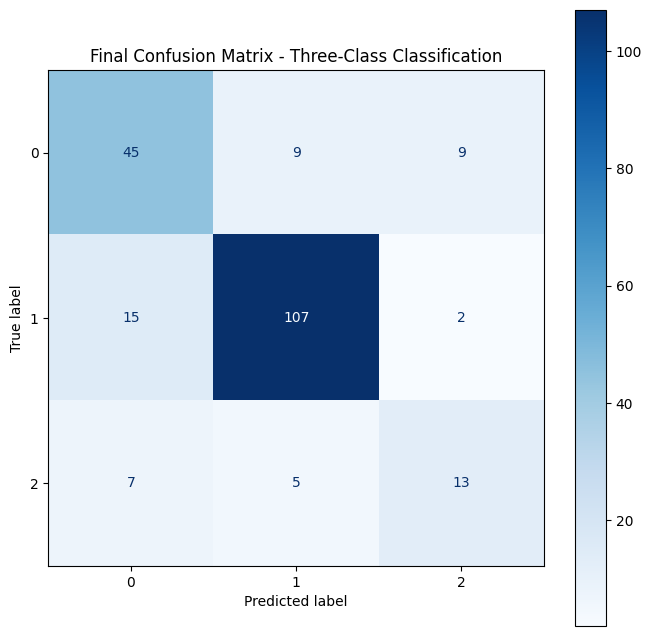

In [ ]:
# Step 2 re-encoding needs to be reversed for the final classification
# 0 remains 0, 1 (re-encoded class 2) needs to be turned back to 2
test_data.loc[test_data_step2.index, 'Predicted_step2'] = y_pred_step2
test_data.loc[test_data_step2.index, 'Predicted_step2'] = test_data['Predicted_step2'].replace(1, 2)

# Combine Step 1 and Step 2 predictions into a final classification result
def combine_predictions(row):
    if row['Predicted_step1'] == 1:
        return 1  # Direct classification as class 1
    else:
        return row['Predicted_step2']  # Either 0 or 2 as classified in Step 2

test_data['Final_Prediction'] = test_data.apply(combine_predictions, axis=1)

# Evaluation with the original classes
y_true = test_data['Outcome_numerical']  # Assuming this column has the original class labels
y_pred_final = test_data['Final_Prediction']

# Calculate and display evaluation metrics for the final three-class classification
accuracy_final = accuracy_score(y_true, y_pred_final)
precision_final = precision_score(y_true, y_pred_final, average='macro')
recall_final = recall_score(y_true, y_pred_final, average='macro')
f1_final = f1_score(y_true, y_pred_final, average='macro')

print(f"Final Model Accuracy: {accuracy_final}")
print(f"Final Model Precision: {precision_final}")
print(f"Final Model Recall: {recall_final}")
print(f"Final Model F1 Score: {f1_final}")

# Visualize the final confusion matrix
conf_matrix_final = confusion_matrix(y_true, y_pred_final)
fig, ax = plt.subplots(figsize=(8, 8))
disp_final = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_final, display_labels=[0, 1, 2])
disp_final.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Final Confusion Matrix - Three-Class Classification')
plt.show()


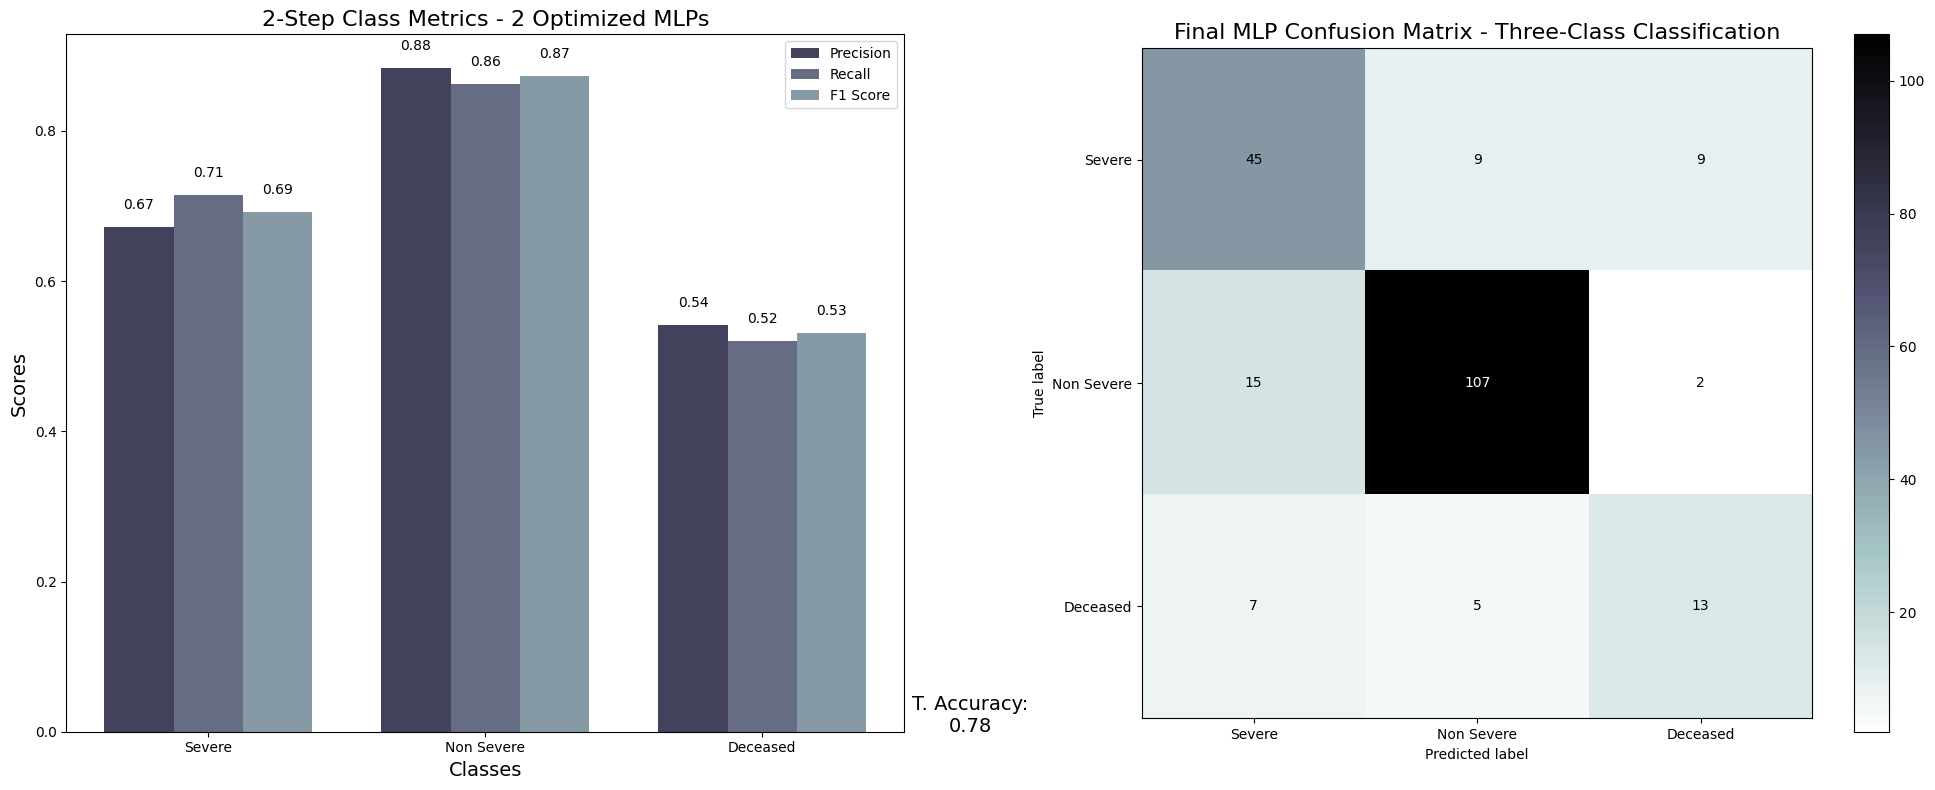

In [ ]:
# Calculate and display evaluation metrics for the final three-class classification
accuracy_final = accuracy_score(y_true, y_pred_final)
precision_final = precision_score(y_true, y_pred_final, average=None)  # Changed to None for individual class scores
recall_final = recall_score(y_true, y_pred_final, average=None)  
f1_final = f1_score(y_true, y_pred_final, average=None)  
conf_matrix_final = confusion_matrix(y_true, y_pred_final)

class_labels = ['Severe', 'Non Severe', 'Deceased']

# Creating a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
bone_palette = plt.cm.bone(np.linspace(0.3, 0.6, 3))

bar_width = 0.25
index = np.arange(len(class_labels))

# Plotting precision, recall, and F1-score for each class
axes[0].bar(index, precision_final, bar_width, color=bone_palette[0], label='Precision')
axes[0].bar(index + bar_width, recall_final, bar_width, color=bone_palette[1], label='Recall')
axes[0].bar(index + 2 * bar_width, f1_final, bar_width, color=bone_palette[2], label='F1 Score')

# Setting labels and titles
axes[0].set_xlabel('Classes', fontsize=14)
axes[0].set_ylabel('Scores', fontsize=14)
axes[0].set_title('2-Step Class Metrics - 2 Optimized MLPs', fontsize=16)
axes[0].set_xticks(index + bar_width)
axes[0].set_xticklabels(class_labels)
axes[0].legend()

# Adding text annotations for clarity
for i in range(len(class_labels)):
    axes[0].text(i, precision_final[i] + 0.02, f'{precision_final[i]:.2f}', ha='center', va='bottom')
    axes[0].text(i + bar_width, recall_final[i] + 0.02, f'{recall_final[i]:.2f}', ha='center', va='bottom')
    axes[0].text(i + 2 * bar_width, f1_final[i] + 0.02, f'{f1_final[i]:.2f}', ha='center', va='bottom')

axes[0].text(len(class_labels), 0, f'T. Accuracy:\n{accuracy_final:.2f}', fontsize=14, ha='center')
# Confusion Matrix Display
conf_matrix_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_final, display_labels=class_labels)
conf_matrix_disp.plot(cmap=plt.cm.bone_r, ax=axes[1], colorbar=True)
axes[1].set_title('Final MLP Confusion Matrix - Three-Class Classification', fontsize=16)

plt.tight_layout()
plt.show()
